# Preprocessing 

## Some Inferences from the Raw Data

<ol>
<li>The Balance of the dataset is 7:3 which makes it critical to think weather it should be balanced or imbalanced. Since w e have adequate amount of records for the minority class I might consider it balanced and apply K-fold while splitting</li>

<li>There are some columns which have more than 60% percent of missing cells. We might need to eliminate them or they will add unnecessary bias incase we try imputing them</li>

<li>All sorts of Variables are present within the dataset and hence, we need to take special care while handling each variable</li>

<li>The Variable "Telephone" is constant (No Use)</li>

</ol>

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer

In [4]:
import shap

In [5]:

data = pd.read_csv('data/data_merged.csv')

In [6]:
data

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


In [7]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

# Step-1 Handling Missing Values

Plotting SNS heatmap to check which columns have what amount of missing values

<AxesSubplot:>

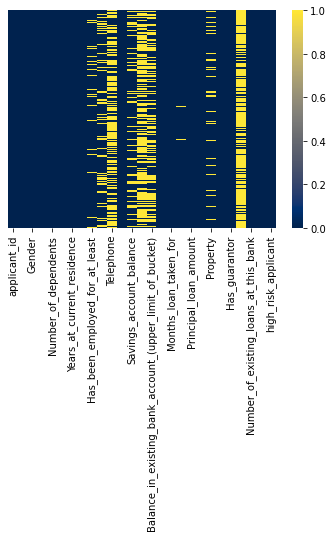

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='cividis')

Let us first check which Column has maximum missing values


In [10]:
pd.Series(data.isnull().sum()).sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Months_loan_taken_for                                         0
Loan_history                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                   

From te above Data we can conclude that
<ol>
<li>There are total 9 columns with null values</li>
<li>Out of the 9 columns 2 Columns namely 'Telephone' and 'Other_EMI_plans' needs to be eliminated entirely. Since, Telephone is a constant and Other_EMI_Plans have more than 80% null Values</li>
<li>The 2 columns 'Existing Bank Balance' also needs to be eliminated and they also do not enough variance among the data</li>

</ol>

In [11]:
## Eliminating the columns
cols_to_remove = [
    'Other_EMI_plans',
    'Telephone',         
'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
'Balance_in_existing_bank_account_(upper_limit_of_bucket)' ]
data_with_23_cols = data.drop(cols_to_remove, axis = 1)

In [12]:
data_with_23_cols

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,45,electronic equipment,1845000,4,NaN,0,0,1,existing loans paid back duly till now,1


#### Going for the remaining features with missing data

<AxesSubplot:>

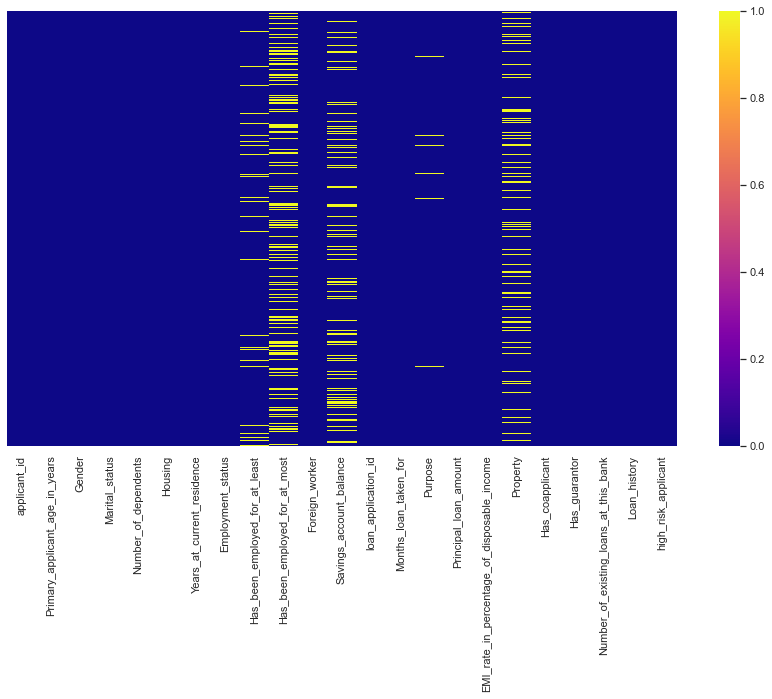

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_with_23_cols.isnull(), yticklabels=False, cbar=True, cmap='plasma')

<b>  We will impute the remaining features using KNN imputer</b>

Since, all the columns that require imputation are non-numeric.

In [14]:

def impute_by_KNN(df,column_name):
    fact_col, lable = pd.factorize(df[column_name])
    imputer = KNNImputer(n_neighbors=5, weights="distance", add_indicator = True)
    imputed = imputer.fit_transform([fact_col])
    imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
    df.drop(columns=column_name, inplace=True)
    df[column_name ] = imputed[0]
    return df
    

In [20]:
cols_to_impute = ['Has_been_employed_for_at_most',                               
'Savings_account_balance',                                     
'Property',                                                    
'Has_been_employed_for_at_least',                              
'Purpose' ] 

In [21]:
for col in cols_to_impute:
    impute_by_KNN(data_with_23_cols,col)

Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.


<AxesSubplot:>

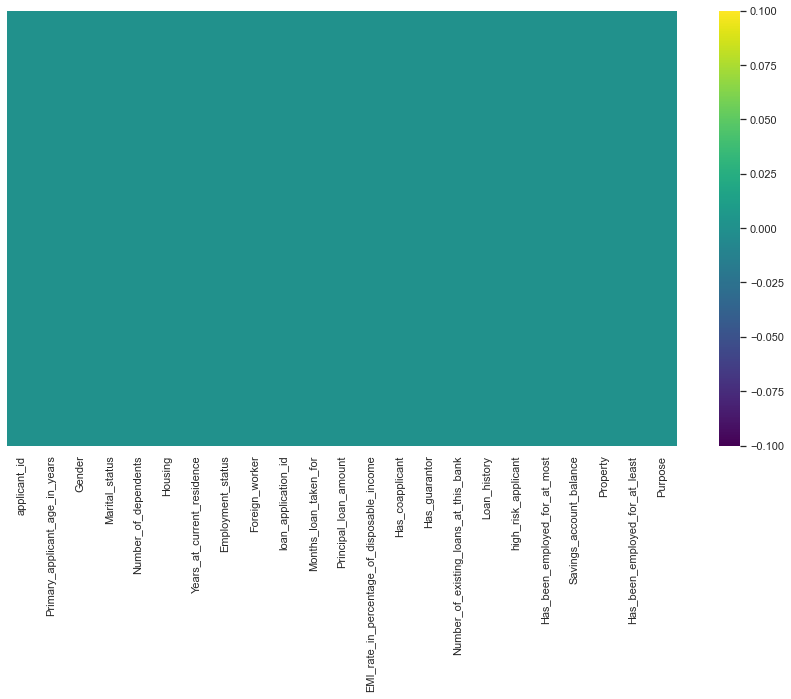

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_with_23_cols.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [24]:
pd.Series(data_with_23_cols.isnull().sum()).sort_values(ascending=False)

applicant_id                                   0
EMI_rate_in_percentage_of_disposable_income    0
Has_been_employed_for_at_least                 0
Property                                       0
Savings_account_balance                        0
Has_been_employed_for_at_most                  0
high_risk_applicant                            0
Loan_history                                   0
Number_of_existing_loans_at_this_bank          0
Has_guarantor                                  0
Has_coapplicant                                0
Principal_loan_amount                          0
Primary_applicant_age_in_years                 0
Months_loan_taken_for                          0
loan_application_id                            0
Foreign_worker                                 0
Employment_status                              0
Years_at_current_residence                     0
Housing                                        0
Number_of_dependents                           0
Marital_status      

##### As you can see ther are no more null values in the dataset

In [25]:
#Saving the data for further_use

data_with_23_cols.to_csv('data/data_wo_missing_cell.csv')

# Step-2 Facotorizing/Encoding Nominal, Ordinal Data